<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/CNN_FILTERS_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#lets first import the dependencies
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('Tensorflow_version',tf.__version__)

Tensorflow_version 2.15.0


In [2]:
#now lets bring the model
model=tf.keras.applications.vgg16.VGG16(
    include_top=False ,weights='imagenet',
    input_shape=(96,96,3)
)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

In [4]:
#get sub models
#this can be used when you want to plot a certain model

def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )


get_submodel('block1_conv2').summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38720 (151.25 KB)
Trainable params: 38720 (151.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
def create_image(): #cretaes uniform distributed data
  return tf.random.uniform((96,96,3))

def plot_image(image,title='random'): #normalizes and plots the image
  #here we try to normalize the image
  image=image-tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)

  plt.imshow(image)
  plt.show()


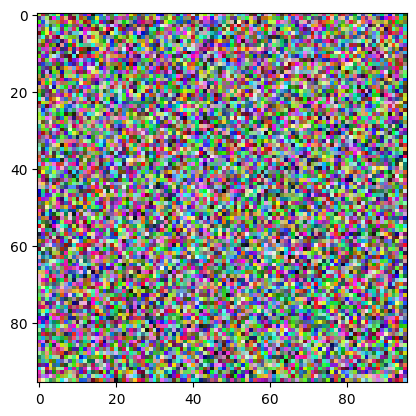

In [8]:
image=create_image() #image with random distribution
plot_image(image)

In [9]:
#here we define the training loop

def visualize_filter(layer_name,f_index=None,iters=50):
  submodel=get_submodel(layer_name)
  num_filters=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0,num_filters-1)
  assert num_filters>f_index , 'f_index out of bounds'

  image=create_image()
  verbose_step=int(iters/10)

  for i in range(0,iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image,axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(out)
    grads=tape.gradient(loss,image)
    grads=tf.math.l2_normalize(grads)
    image +=grads*10

    if (i+1)%verbose_step==0:
      print(f'Iteration: {i+1} ,Loss : {loss.numpy():.4f}')

  plot_image(image,f'{layer_name},{f_index}')

In [10]:
#final results
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 10 ,Loss : 30.7532
Iteration: 20 ,Loss : 51.4725
Iteration: 30 ,Loss : 72.6402
Iteration: 40 ,Loss : 97.8623
Iteration: 50 ,Loss : 127.4051
Iteration: 60 ,Loss : 161.5410
Iteration: 70 ,Loss : 199.2714
Iteration: 80 ,Loss : 239.3734
Iteration: 90 ,Loss : 281.3354
Iteration: 100 ,Loss : 324.4034


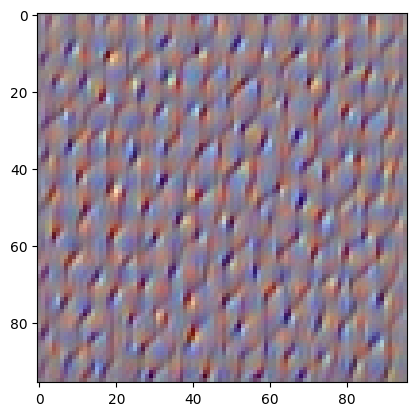

In [15]:
layer_name='block3_conv1' #@param['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


visualize_filter(layer_name,iters=100)

Iteration: 10 ,Loss : 21.5140
Iteration: 20 ,Loss : 50.2500
Iteration: 30 ,Loss : 77.6599
Iteration: 40 ,Loss : 107.9814
Iteration: 50 ,Loss : 143.9173
Iteration: 60 ,Loss : 183.9759
Iteration: 70 ,Loss : 228.6385
Iteration: 80 ,Loss : 278.7936
Iteration: 90 ,Loss : 331.1165
Iteration: 100 ,Loss : 385.1499


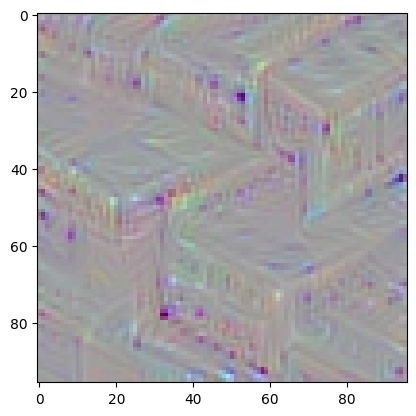

In [16]:
layer_name='block5_conv1' #@param['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


visualize_filter(layer_name,iters=100)